In [19]:
# Here we will visualize the data

In [20]:
# importing libraries
import sys
import datetime 
from pprint import pprint
import os
import re
from copy import deepcopy
import glob
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# assuming pbds_automat and plotting_data and output folder are in the same folder
# hard coded for this project
i = .03
height_list = []
while i < 1:
    height_list.append(i)
    i += .06
    i = round(i, 2)    

    
#==============================================

In [21]:
# We take the folder name as cmd line input
# TODO: We can read all the folder name and take the last folder 
# if input is not given
try:
    folder_name = sys.arg[1]
except:
    default_dir = "t_120_06_06_2022_10_12_33"
    print("No folder name provided as system arg. Continue with default " + default_dir)
    folder_name = default_dir
    
print(folder_name)

# capturing only device files
devc_file_list = glob.glob(folder_name+"/**/*_devc.csv", recursive=True)

if not devc_file_list:
    print("No output file captured!")

No folder name provided as system arg. Continue with default t_120_06_06_2022_10_12_33
t_120_06_06_2022_10_12_33


In [22]:
#Some utility function and project constant
def curr_timestamp():
    return datetime.datetime.now().strftime("%m_%d_%Y_%H_%M_%S")

def curr_dir():
    return os. getcwd().replace('\\', '/') + '/'

curr_d = curr_dir()
curr_ts = curr_timestamp()
output_root_d = curr_d + folder_name + "/"

In [23]:
# creating output folder
report_dir = output_root_d+'reports-'+ curr_ts + '/'
os.makedirs(report_dir)

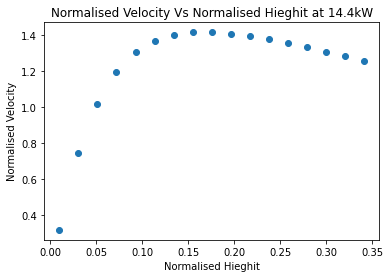

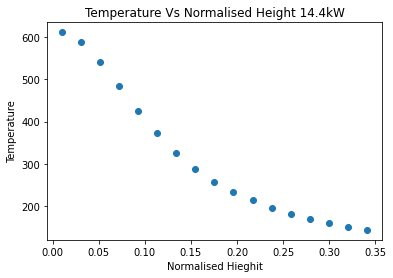

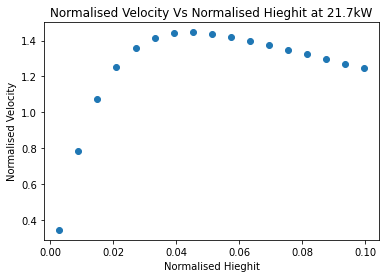

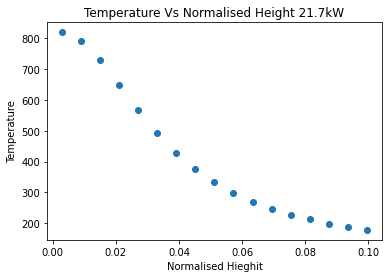

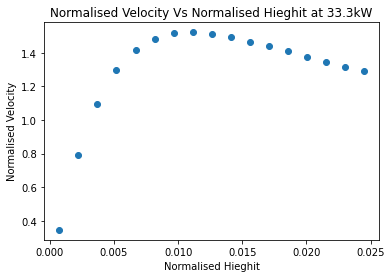

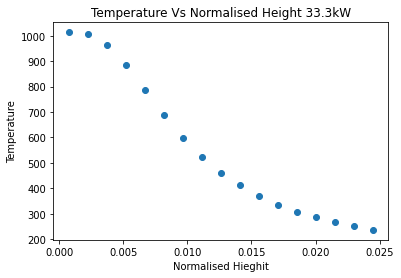

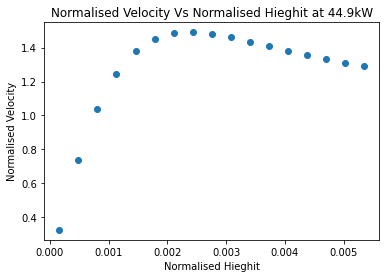

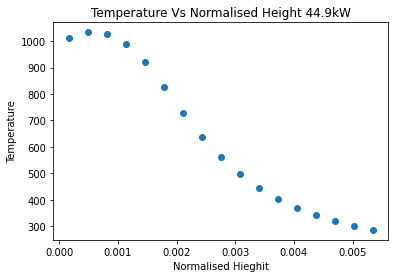

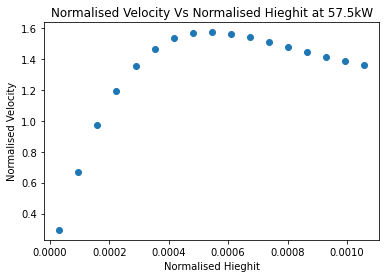

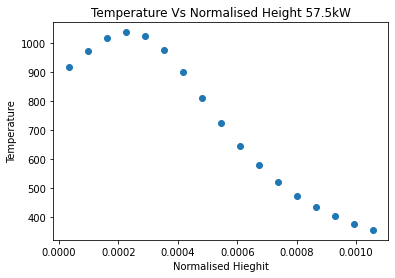

In [24]:
# magic starts here
for dvec_f in devc_file_list:
    # reading *_ devc.csv files and creating df 
    t_df = pd.read_csv(curr_d+dvec_f.replace("\\", "/"), header=1)
    t_df_mean = t_df.mean().iloc[1:]
    
    # reading the hrr
    hrr = float(re.match(r"pbdf-(.*)kW_devc\.csv", dvec_f.replace("\\", "/").rsplit("/", 1)[1]).group(1).replace("_", "."))
    
    # Dynamically reading the Temperature, Height and Velocity column
    velocity_list = [t_df_mean[x]/hrr**(1/5) for x in t_df_mean.index if 'V-' in x]
    temp_list = [t_df_mean[x] for x in t_df_mean.index if 'T-' in x]
    height_list = [x/hrr**(2/5) for x in height_list]
    
    # creating the plot
    # Plot will also be saved in a folder, example: t_120_06_06_2022_10_12_33/reports-06_07_2022_06_31_42
    plt.figure()
    plt.scatter(height_list, velocity_list)
    plt.title("Normalised Velocity Vs Normalised Hieghit at {}kW".format(hrr))
    plt.ylabel('Normalised Velocity')
    plt.xlabel('Normalised Hieghit')
    plt.savefig(report_dir+'v_h_{}.pdf'.format(hrr))
    
    plt.figure()
    plt.scatter(height_list, temp_list)
    plt.title("Temperature Vs Normalised Height {}kW".format(hrr))
    plt.ylabel('Temperature')
    plt.xlabel('Normalised Hieghit')
    plt.savefig(report_dir+'t_h_{}.pdf'.format(hrr))
    
    
plt.show()

In [25]:
# Currently both results validated the experimental results. 